In [132]:
############################################
####### Set up Environment Variables #######
############################################
library(statmod)
library(limma)
library(edgeR)

options(repr.plot.width = 4, repr.plot.height = 3)


easyTCGA = '/home/ruidong/Documents/Research/Cancer_Genomics/easyTCGA_test'
project = 'TCGA-PRAD'
genoDataType = 'miRNA_Expression_Quantification'
analysis = 'Analysis'

setwd(paste(easyTCGA, project, genoDataType, analysis, sep='/'))

In [ ]:
###################################################
#### Differential Expression Analysis by limma ####
###################################################

readCounts <- read.table('miRseq.counts_and_traits.TCGA-PRAD.txt', header = T, stringsAsFactors = F)
dim(readCounts)
readCounts[1:5,1:5]

sampleType = as.matrix(readCounts['sample_type',])
sampleType
sampleType = as.factor(sampleType)

-


In [111]:
###################################################
#### Differential Expression Analysis by limma ####
###################################################

readCounts <- read.table('miRseq.counts_and_traits.TCGA-PRAD.txt', header = T, stringsAsFactors = F)
dim(readCounts)
readCounts[1:5,1:5]

[1] 1893  551

,TCGA.CH.5743.01A,TCGA.EJ.5510.01A,TCGA.HC.7081.01A,TCGA.TK.A8OK.01A,TCGA.V1.A8WV.01A
sample_type,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor
sample_type_id,01,01,01,01,01
tumor_stage,NA,NA,NA,NA,NA
tumor_grade,NA,NA,NA,NA,NA
age_at_diagnosis,24321.0,17895.0,NA,26976.0,19345.0


In [133]:

sampleType = as.matrix(readCounts['sample_type',])
sampleType
sampleType = as.factor(sampleType)

### summary of sample type
table(sampleType)

,TCGA.CH.5743.01A,TCGA.EJ.5510.01A,TCGA.HC.7081.01A,TCGA.TK.A8OK.01A,TCGA.V1.A8WV.01A,TCGA.EJ.A8FU.01A,TCGA.HC.8261.01B,TCGA.HC.A6AQ.01A,TCGA.ZG.A8QX.01A,TCGA.VP.A87B.01A,⋯,TCGA.CH.5744.01A,TCGA.VN.A88L.01A,TCGA.J4.A6G3.01A,TCGA.FC.7708.01A,TCGA.EJ.5517.01A,TCGA.H9.7775.01A,TCGA.ZG.A9L0.01A,TCGA.HC.8262.01A,TCGA.EJ.5497.01A,TCGA.EJ.A7NM.01A
sample_type,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,⋯,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor,PrimaryTumor


sampleType
       Metastatic      PrimaryTumor SolidTissueNormal 
                1               498                52 

In [113]:
design <- model.matrix(~0+sampleType)
for (i in 1:length(colnames(design))) {
  colnames(design)[i] = sub('sampleType', '',colnames(design)[i])
}
head(design)


contrast.matrix <- makeContrasts(PrimaryTumor-SolidTissueNormal, levels=design) # do it manually
contrast.matrix

,Metastatic,PrimaryTumor,SolidTissueNormal
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,1,0


,PrimaryTumor - SolidTissueNormal
Metastatic,0
PrimaryTumor,1
SolidTissueNormal,-1


In [115]:

### TMM normalization on the raw counts by edgeR
dge = DGEList(counts = readCounts[13:nrow(readCounts),], group = sampleType)
head(dge$samples)

### filtering and normalization
#keep <- rowSums(dge$counts) > 378
numSamples = summary(sampleType)['PrimaryTumor']+summary(sampleType)['SolidTissueNormal']
keep <- rowSums(cpm(dge) > 1) >= 0.5*numSamples ## not sure how much is better
summary(keep)

dge <- dge[keep,,keep.lib.sizes = FALSE]
#write.table(rownames(dge), file='Genes_with_detectable_expression_value.txt', sep='\t', quote=FALSE)

dge = calcNormFactors(dge)
head(dge$samples)

,group,lib.size,norm.factors
TCGA.CH.5743.01A,PrimaryTumor,6792951,1
TCGA.EJ.5510.01A,PrimaryTumor,4826527,1
TCGA.HC.7081.01A,PrimaryTumor,5844605,1
TCGA.TK.A8OK.01A,PrimaryTumor,10028473,1
TCGA.V1.A8WV.01A,PrimaryTumor,3791670,1
TCGA.EJ.A8FU.01A,PrimaryTumor,8429774,1


   Mode   FALSE    TRUE    NA's 
logical    1582     299       0 

,group,lib.size,norm.factors
TCGA.CH.5743.01A,PrimaryTumor,6792364,0.6013563
TCGA.EJ.5510.01A,PrimaryTumor,4826125,0.6058422
TCGA.HC.7081.01A,PrimaryTumor,5843860,1.0739466
TCGA.TK.A8OK.01A,PrimaryTumor,10027388,0.8733532
TCGA.V1.A8WV.01A,PrimaryTumor,3790761,1.5051673
TCGA.EJ.A8FU.01A,PrimaryTumor,8429076,0.6715301


,TCGA.CH.5743.01A,TCGA.EJ.5510.01A,TCGA.HC.7081.01A,TCGA.TK.A8OK.01A,TCGA.V1.A8WV.01A
hsa-let-7a-1,13.72091,13.22580,13.46819,12.99352,12.73283
hsa-let-7a-2,14.70524,14.21374,14.46237,12.99828,13.73178
hsa-let-7a-3,13.70038,13.21893,13.48291,12.99522,12.73546
hsa-let-7b,13.22277,13.01350,13.39921,12.15491,12.15999
hsa-let-7c,14.01050,14.07436,13.25567,12.37702,13.08560


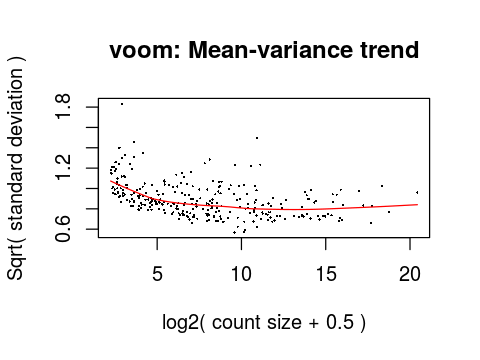

In [124]:

### voom transformation
v <- voom(dge, design, plot = TRUE)
v$E[1:5,1:5]


In [119]:
### differential expression analysis
fit <- lmFit(v, design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
results_type <- decideTests(fit2, adjust.method = 'BH', p.value = 0.01, lfc = 1, method='global')
head(results_type)

summary(results_type)

,PrimaryTumor - SolidTissueNormal
hsa-let-7a-1,0
hsa-let-7a-2,0
hsa-let-7a-3,0
hsa-let-7b,0
hsa-let-7c,0
hsa-let-7d,0


   PrimaryTumor - SolidTissueNormal
-1                               23
0                               248
1                                28

In [123]:
#vennDiagram(results_type, include=c('up', 'down'), col=c('red','blue'))

DEG_P2N <- topTable(fit2, coef=1, n = Inf, sort.by = 'P', p=0.01, lfc = 1)
DEG_P2N <- na.omit(DEG_P2N)

outFile = paste('limma_001_2X_miRNAs_sample_type_TCGA',project,'txt', sep='.')
write.table(DEG_P2N, file = outFile, quote = FALSE, sep = '\t')


In [135]:
options(jupyter.plot_mimetypes = "image/png")

[1] 8.944792e-55 3.447415e-49 3.893439e-44 3.566624e-42 4.154542e-40
[6] 6.008507e-39

[1] TRUE TRUE TRUE TRUE TRUE TRUE
Levels: FALSE TRUE

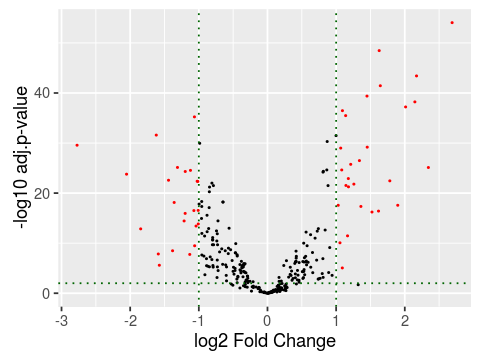

In [136]:
### volcano plot
geneList <- topTable(fit2, coef=1, n=Inf, adjust.method = 'BH', sort.by='P')
head(geneList$adj.P.Val)
geneList$threshold <- as.factor(abs(geneList$logFC)>1 & geneList$adj.P.Val<0.01)
head(geneList$threshold)
volcano <- ggplot(data=geneList, aes(x=geneList$logFC, y = -log10(geneList$adj.P.Val)))
#volcano <- ggplot(data=geneList, aes(x=-log10(geneList$adj.P.Val), y = geneList$logFC))
volcano+geom_point(aes(color=geneList$threshold), alpha=1, size=0.2) + xlab("log2 Fold Change") + ylab("-log10 adj.p-value") +
  scale_colour_manual(breaks = geneList$threshold, values = c('black', 'red')) + theme(legend.position="none") +
  geom_vline(xintercept = c(-1,1), color='darkgreen', linetype=3) + geom_hline(yintercept = 2, color='darkgreen',linetype=3)#+ xlim(0, 20)